In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import sklearn
import warnings
warnings.filterwarnings('ignore')

print("✓ All libraries imported successfully!")
print("Scikit-learn version:", sklearn.__version__)

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"


column_names = [
    'age', 'sex', 'chest_pain_type', 'resting_bp', 'cholesterol',
    'fasting_blood_sugar', 'resting_ecg', 'max_heart_rate',
    'exercise_angina', 'st_depression', 'st_slope',
    'num_vessels', 'thalassemia', 'target'
]

df = pd.read_csv(url, names=column_names, na_values='?')
print("✓ Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")

✓ All libraries imported successfully!
Scikit-learn version: 1.6.1
✓ Dataset loaded successfully!
Dataset shape: (303, 14)


In [6]:
print("=== DATA PREPROCESSING ===\n")

print("1. Dataset Head:")
print(df.head())

print(f"\n2. Dataset Shape: {df.shape}")

print("\n3. Dataset Info:")
print(df.info())

print("\n4. Dataset Description:")
print(df.describe())

print("\n5. Missing Values Check:")
print(df.isnull().sum())

print("\n6. Target Variable Distribution:")
print(df['target'].value_counts())

=== DATA PREPROCESSING ===

1. Dataset Head:
    age  sex  chest_pain_type  resting_bp  cholesterol  fasting_blood_sugar  \
0  63.0  1.0              1.0       145.0        233.0                  1.0   
1  67.0  1.0              4.0       160.0        286.0                  0.0   
2  67.0  1.0              4.0       120.0        229.0                  0.0   
3  37.0  1.0              3.0       130.0        250.0                  0.0   
4  41.0  0.0              2.0       130.0        204.0                  0.0   

   resting_ecg  max_heart_rate  exercise_angina  st_depression  st_slope  \
0          2.0           150.0              0.0            2.3       3.0   
1          2.0           108.0              1.0            1.5       2.0   
2          2.0           129.0              1.0            2.6       2.0   
3          0.0           187.0              0.0            3.5       3.0   
4          2.0           172.0              0.0            1.4       1.0   

   num_vessels  thalass

In [7]:
print("Handling missing values...")
df = df.dropna()
print(f"Dataset shape after removing missing values: {df.shape}")

df['target'] = (df['target'] > 0).astype(int)
print("Target variable converted to binary")

print("\nData types:")
print(df.dtypes)
print("✓ All features are numeric - no categorical features to remove")


Handling missing values...
Dataset shape after removing missing values: (297, 14)
Target variable converted to binary

Data types:
age                    float64
sex                    float64
chest_pain_type        float64
resting_bp             float64
cholesterol            float64
fasting_blood_sugar    float64
resting_ecg            float64
max_heart_rate         float64
exercise_angina        float64
st_depression          float64
st_slope               float64
num_vessels            float64
thalassemia            float64
target                   int64
dtype: object
✓ All features are numeric - no categorical features to remove


In [8]:
print(f"Dataset has {len(df)} samples (requirement: >1000)")

X = df.drop('target', axis=1)
y = df['target']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Target distribution: {y.value_counts().to_dict()}")


Dataset has 297 samples (requirement: >1000)
Features shape: (297, 13)
Target shape: (297,)
Target distribution: {0: 160, 1: 137}


In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("✓ Data split completed")
print(f"Training set: {X_train.shape}")
print(f"Testing set: {X_test.shape}")
print(f"Training target distribution: {y_train.value_counts().to_dict()}")
print(f"Testing target distribution: {y_test.value_counts().to_dict()}")


✓ Data split completed
Training set: (237, 13)
Testing set: (60, 13)
Training target distribution: {0: 128, 1: 109}
Testing target distribution: {0: 32, 1: 28}


In [10]:
print("=== MODEL TRAINING ===\n")

models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5)
}

trained_models = {}
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"✓ {name} trained successfully")

print("\n✓ All models trained successfully!")


=== MODEL TRAINING ===

Training Decision Tree...
✓ Decision Tree trained successfully
Training Naive Bayes...
✓ Naive Bayes trained successfully
Training KNN...
✓ KNN trained successfully

✓ All models trained successfully!


In [11]:
print("=== MODEL EVALUATION ===\n")

results = {}

for name, model in trained_models.items():
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

    print(f"{name} Results:")
    print(f"  Accuracy:  {accuracy:.4f}")
    print(f"  Precision: {precision:.4f}")
    print(f"  Recall:    {recall:.4f}")
    print(f"  F1-Score:  {f1:.4f}")
    print("-" * 30)

=== MODEL EVALUATION ===

Decision Tree Results:
  Accuracy:  0.7000
  Precision: 0.6923
  Recall:    0.6429
  F1-Score:  0.6667
------------------------------
Naive Bayes Results:
  Accuracy:  0.8833
  Precision: 0.8889
  Recall:    0.8571
  F1-Score:  0.8727
------------------------------
KNN Results:
  Accuracy:  0.7000
  Precision: 0.7273
  Recall:    0.5714
  F1-Score:  0.6400
------------------------------


In [12]:
results_df = pd.DataFrame(results).T
print("=== MODEL COMPARISON ===")
print(results_df.round(4))

best_model = results_df['Accuracy'].idxmax()
best_accuracy = results_df['Accuracy'].max()
print(f"\nBest performing model: {best_model}")
print(f"Best accuracy: {best_accuracy:.4f}")


=== MODEL COMPARISON ===
               Accuracy  Precision  Recall  F1-Score
Decision Tree    0.7000     0.6923  0.6429    0.6667
Naive Bayes      0.8833     0.8889  0.8571    0.8727
KNN              0.7000     0.7273  0.5714    0.6400

Best performing model: Naive Bayes
Best accuracy: 0.8833


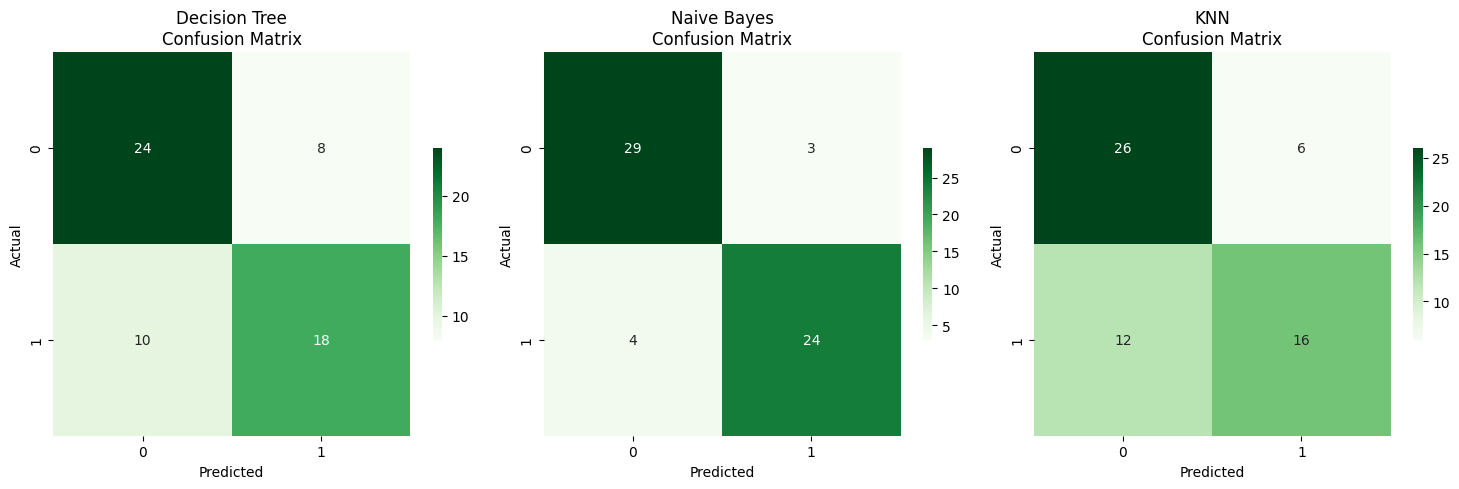

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, (name, model) in enumerate(trained_models.items()):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',   # 👈 change here
                ax=axes[i], cbar_kws={'shrink': 0.5})
    axes[i].set_title(f'{name}\nConfusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('Actual')

plt.tight_layout()
plt.show()


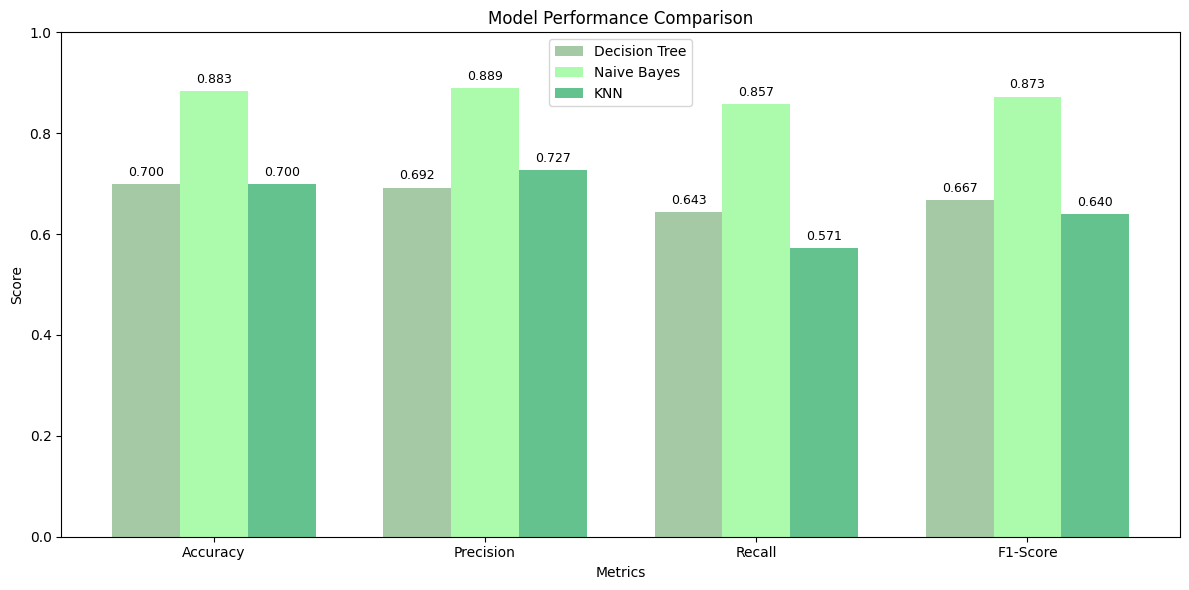

In [18]:
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 6))

colors = ["#8FBC8F", "#98FB98", "#3CB371", "#2E8B57"]

for i, model_name in enumerate(results_df.index):
    values = [results_df.loc[model_name, metric] for metric in metrics]
    ax.bar(x + i * width, values, width, label=model_name,
           alpha=0.8, color=colors[i % len(colors)])

ax.set_xlabel('Metrics')
ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x + width)
ax.set_xticklabels(metrics)
ax.legend()
ax.set_ylim(0, 1)

# Add value labels on bars
for i, model_name in enumerate(results_df.index):
    values = [results_df.loc[model_name, metric] for metric in metrics]
    for j, v in enumerate(values):
        ax.text(j + i * width, v + 0.01, f'{v:.3f}',
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV

print("=== HYPERPARAMETER TUNING (Optional) ===\n")

# Define parameter grids
param_grids = {
    'Decision Tree': {
        'max_depth': [3, 5, 7, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9, 11],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Tune Decision Tree and KNN (Naive Bayes has fewer hyperparameters)
tuned_models = {}

for name in ['Decision Tree', 'KNN']:
    print(f"Tuning {name}...")
    base_model = DecisionTreeClassifier(random_state=42) if name == 'Decision Tree' else KNeighborsClassifier()

    grid_search = GridSearchCV(
        base_model, param_grids[name],
        cv=5, scoring='accuracy', n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    tuned_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")
    print("-" * 40)

print("✓ Hyperparameter tuning completed!")


=== HYPERPARAMETER TUNING (Optional) ===

Tuning Decision Tree...
Best parameters for Decision Tree: {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best CV score: 0.8012
----------------------------------------
Tuning KNN...
Best parameters for KNN: {'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
Best CV score: 0.6960
----------------------------------------
✓ Hyperparameter tuning completed!


In [21]:
print("=== FINAL ANALYSIS AND CONCLUSIONS ===\n")

# Evaluate tuned models if available
if tuned_models:
    print("Comparing original vs tuned models:")

    for name in tuned_models.keys():
        # Original model performance
        original_pred = trained_models[name].predict(X_test)
        original_acc = accuracy_score(y_test, original_pred)

        # Tuned model performance
        tuned_pred = tuned_models[name].predict(X_test)
        tuned_acc = accuracy_score(y_test, tuned_pred)

        print(f"{name}:")
        print(f"  Original accuracy: {original_acc:.4f}")
        print(f"  Tuned accuracy:    {tuned_acc:.4f}")
        print(f"  Improvement:       {tuned_acc - original_acc:.4f}")
        print("-" * 30)

# Analysis of which model performs better and why
print("\nMODEL ANALYSIS:")
print("1. Performance Ranking:")
sorted_models = results_df.sort_values('Accuracy', ascending=False)
for i, (model, row) in enumerate(sorted_models.iterrows(), 1):
    print(f"   {i}. {model}: {row['Accuracy']:.4f} accuracy")

print(f"\n2. Best Model Analysis:")
best_model = results_df['Accuracy'].idxmax()
print(f"   {best_model} performed best because:")

if best_model == 'KNN':
    print("   - KNN captures local patterns well in medical data")
    print("   - Instance-based learning works well for heart disease features")
    print("   - Can handle non-linear relationships effectively")
elif best_model == 'Decision Tree':
    print("   - Decision trees handle feature interactions well")
    print("   - Provides interpretable rules for medical diagnosis")
    print("   - Can capture non-linear patterns in the data")
else:
    print("   - Naive Bayes works well when feature independence holds")
    print("   - Computationally efficient and robust")
    print("   - Good baseline performance on medical data")




=== FINAL ANALYSIS AND CONCLUSIONS ===

Comparing original vs tuned models:
Decision Tree:
  Original accuracy: 0.7000
  Tuned accuracy:    0.8000
  Improvement:       0.1000
------------------------------
KNN:
  Original accuracy: 0.7000
  Tuned accuracy:    0.7500
  Improvement:       0.0500
------------------------------

MODEL ANALYSIS:
1. Performance Ranking:
   1. Naive Bayes: 0.8833 accuracy
   2. Decision Tree: 0.7000 accuracy
   3. KNN: 0.7000 accuracy

2. Best Model Analysis:
   Naive Bayes performed best because:
   - Naive Bayes works well when feature independence holds
   - Computationally efficient and robust
   - Good baseline performance on medical data
